In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import preprocessing as prep

### Concatenating the data

In [149]:
test = pd.read_csv("DailyDelhiClimateTest.csv")
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [150]:
training = pd.read_csv("DailyDelhiClimateTrain.csv")
training.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [151]:
all_data = pd.concat([test, training])
all_data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

### Check for missing values

In [152]:
all_data.isnull().sum()
#No missing values initially

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Check for outliers

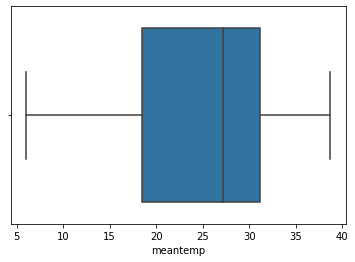

In [153]:
#Checking for outliers
#meantemp column
sns.boxplot(x = all_data['meantemp'])

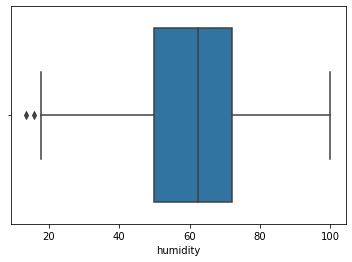

In [154]:
#humidity column
sns.boxplot(x = all_data['humidity'])

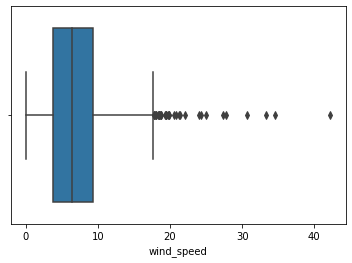

In [155]:
#wind_speed column
sns.boxplot(x = all_data['wind_speed'])

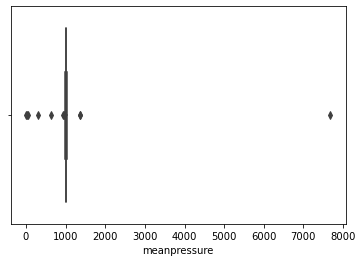

In [156]:
#meanpressure column
sns.boxplot(x = all_data['meanpressure'])

### Dropping outliers from meanpressure

In [157]:
#There are outliers in humidity, wind_speed, and meanpressure
#Choosing to drop the outliers in meanpressure because the value is so far beyond the maximum and below the minimum that it likely due to 
#incorrectly entered or measured data
q = "meanpressure < 2000 and meanpressure > 800"
all_data = all_data.query(q)
all_data.head()

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727


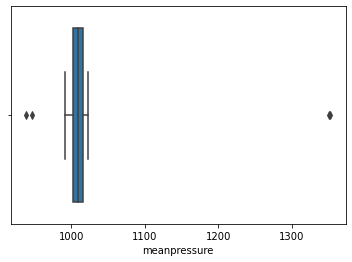

In [158]:
sns.boxplot(x = all_data['meanpressure'])

### Visualizing the data and checking distributions
### Transforming and Scaling Data

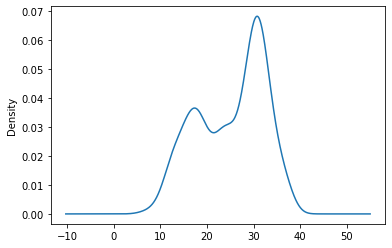

In [159]:
#Generate histogram and check distributions

#meantemp column
all_data['meantemp'].plot.density()

In [160]:
#min and max values for meantemp
print(all_data['meantemp'].min())
print(all_data['meantemp'].max())

6.0
38.714285714285715


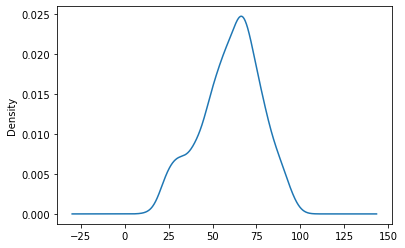

In [161]:
#humidity column
all_data['humidity'].plot.density()

In [162]:
print(all_data['humidity'].min())
print(all_data['humidity'].max())

13.428571428571427
100.0


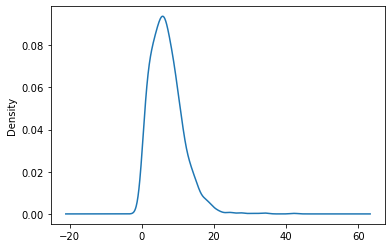

In [163]:
#wind_speed column
all_data['wind_speed'].plot.density()

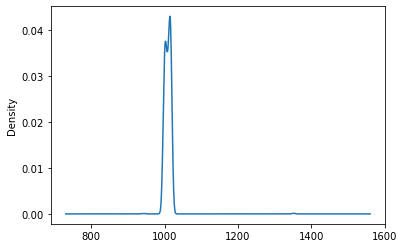

In [164]:
#meanpressure
all_data['meanpressure'].plot.density()

In [165]:
#wind_speed is skewed
print(all_data['wind_speed'].min())
print(all_data['wind_speed'].max())

0.0
42.22


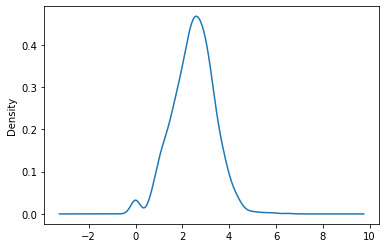

In [166]:
#wind_speed column needs to be transformed because it is skewed
all_data['wind_speed_transformed'] = all_data['wind_speed'].apply(np.sqrt)
#transformed wind_speed density plot
all_data['wind_speed_transformed'].plot.density()

In [167]:
#scaling meanpressure because there is a large difference between the min and max
print(all_data['meanpressure'].min())
print(all_data['meanpressure'].max())

938.0666666666667
1352.6153846153845


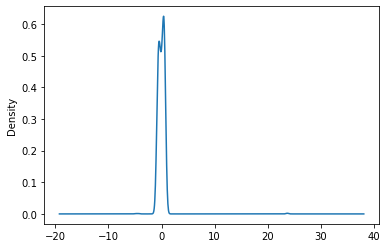

In [168]:
all_data['meanpressure_scaled'] = prep.scale(all_data['meanpressure'])
#scaled meanpressure density plot
all_data['meanpressure_scaled'].plot.density()

### Creating dummy variables

In [169]:
#convert discrete data to dummy variables
#data is a categorical(discrete) variable
dummies = pd.get_dummies(all_data['date'])
dummies.head()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
all_data = pd.concat([all_data, dummies], axis = 1)
all_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,wind_speed_transformed,meanpressure_scaled,2013-01-01,2013-01-02,2013-01-03,...,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,1.701307,0.645934,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2.004162,0.649768,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2.131901,0.468014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,1.816590,0.373686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,2.946493,0.196951,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
#Check again for null values
all_data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
               ..
2017-04-20      0
2017-04-21      0
2017-04-22      0
2017-04-23      0
2017-04-24      0
Length: 1577, dtype: int64

### Creating first linear regression model

In [172]:
all_data.dtypes


date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
                 ...   
2017-04-20        uint8
2017-04-21        uint8
2017-04-22        uint8
2017-04-23        uint8
2017-04-24        uint8
Length: 1577, dtype: object

In [173]:
#date can't be used because it is interval-scaled. it wouldn't make sense to include it within the model
lm = LinearRegression()
x = all_data[['humidity', 'wind_speed_transformed', 'meanpressure_scaled']]
y = all_data['meantemp']
lm.fit(x, y)

LinearRegression()

In [176]:
#R-squared. Tests accuracy
lm.score(x, y)

0.4631829441199595

In [177]:
#RSME
import math
from sklearn.metrics import mean_squared_error

y_predict = lm.predict(x)

regression_model_mse = mean_squared_error(y_predict, y)



math.sqrt(regression_model_mse)

5.384513209449899

### New Model 1

In [182]:
#New Model 1
lm = LinearRegression()
x_1 = all_data[['meanpressure_scaled']]
y_1 = all_data['meantemp']
lm.fit(x_1, y_1)

LinearRegression()

In [183]:
lm.score(x_1, y_1)

0.20268996617562085

In [184]:
import math
from sklearn.metrics import mean_squared_error

y_predict = lm.predict(x_1)

regression_model_mse = mean_squared_error(y_predict, y_1)



math.sqrt(regression_model_mse)

6.562161409938919

### New Model 2

In [185]:
lm = LinearRegression()
x_2 = all_data[['wind_speed_transformed', 'meanpressure_scaled']]
y_2 = all_data['meantemp']
lm.fit(x_2, y_2)

LinearRegression()

In [187]:
lm.score(x_2, y_2)

0.2677123409412281

In [188]:
import math
from sklearn.metrics import mean_squared_error

y_predict = lm.predict(x_2)

regression_model_mse = mean_squared_error(y_predict, y_2)



math.sqrt(regression_model_mse)

6.288892214185967

### New Model 3

In [190]:
lm = LinearRegression()
x_3 = all_data[['wind_speed_transformed']]
y_3 = all_data['meantemp']
lm.fit(x_3, y_3)

LinearRegression()

In [191]:
lm.score(x_3, y_3)

0.09952586935501584

In [192]:
import math
from sklearn.metrics import mean_squared_error

y_predict = lm.predict(x_3)

regression_model_mse = mean_squared_error(y_predict, y_3)



math.sqrt(regression_model_mse)

6.973790781627291

## Justification for Missing Values

1. There were no missing values that needed to be dealt with

## Justification for dropping outliers

1. There are outliers in humidity, wind_speed, and meanpressure. Choosing to drop the outliers in meanpressure because the value is so far beyond the maximum and below the minimum that it likely due to incorrectly entered or measured data

## Justification for scaling data

1. Choosing to scale meanpressure because there is a large difference between min and max. Chose not to scale the other columns because the differences between min and max were not large

## Justification for transforming data

1. Choosing to transform the wind_speed column because the data is right-skewed. Chose not to transform the other columns because they all had fairly normal distributions

## Dummy Variables

1. Could not include date into the regression model because it doesn't make sense to do so. Dummy variables are for categorical data. Dates are interval scaled which is not the same as caegorical data.

## Accuracy Score

1. The accuracy score(R^2) is low which means that less than half of the observed variation can be explained by the model's inputs. This is a low score which means an inaccurate model

## RSME Score

1. The RSME score is low which means that there is not much difference between values predicted by the model and the values observed. A lower score means a more accurate model. 

2. Since the accuracy score and the rsme score give differing conclusions about the model. We can conclude that this is not a good model


## New Models

1. My best model was the first model that I made and it was not a good model. The predictor variables were humidity, wind_speed_transformed, and meanpressure_scaled. R^2 is 0.4631829441199595 which is fairly low. This means that less than half of the observed variation can be explained by the model's input. The RSME score is 5.384513209449899. This score is low which means there isn't much difference between the residuals and the actual data points. The conclusions made from the R^2 and RSME score did not reflect similar conclusions which means the model is not very accurate. The other models had accuracy scores which were lower than the first model. The RSME score was also higher in the other models. 